In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv("dataset for food-delivery-time-prediction.csv")
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38063 entries, 0 to 38062
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           38063 non-null  object 
 1   Delivery_person_ID           38063 non-null  object 
 2   Delivery_person_Age          38063 non-null  int64  
 3   Delivery_person_Ratings      38063 non-null  float64
 4   Restaurant_latitude          38063 non-null  float64
 5   Restaurant_longitude         38063 non-null  float64
 6   Delivery_location_latitude   38063 non-null  float64
 7   Delivery_location_longitude  38063 non-null  float64
 8   Order_Date                   38063 non-null  object 
 9   Time_Orderd                  38063 non-null  object 
 10  Time_Order_picked            38063 non-null  object 
 11  Weatherconditions            38063 non-null  object 
 12  Road_traffic_density         38063 non-null  object 
 13  Vehicle_conditio

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,38063.0,29.609174,5.761565,20.000000,25.000000,30.000000,35.000000,39.000000
Delivery_person_Ratings,38063.0,4.631868,0.316954,2.500000,4.500000,4.700000,4.900000,5.000000
Restaurant_latitude,38063.0,18.751965,6.017216,-30.902872,12.981615,19.055831,22.750040,30.914057
Restaurant_longitude,38063.0,76.920738,3.504826,72.768726,73.897902,76.618203,78.368855,88.433452
Delivery_location_latitude,38063.0,18.983478,5.469373,9.967144,13.066047,19.125831,22.821226,31.054057
Delivery_location_longitude,38063.0,76.984671,3.505006,72.778726,73.940327,76.663067,78.405883,88.563452
Vehicle_condition,38063.0,0.995297,0.817614,0.000000,0.000000,1.000000,2.000000,2.000000
multiple_deliveries,38063.0,0.748811,0.572737,0.000000,0.000000,1.000000,1.000000,3.000000


In [6]:
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,38063,38063,0x4607,1
Delivery_person_ID,38063,1170,RANCHIRES16DEL01,62
Order_Date,38063,44,15-03-2022,1000
Time_Orderd,38063,176,17:55:00,406
Time_Order_picked,38063,193,21:30:00,422
Weatherconditions,38063,6,conditions Fog,6518
Road_traffic_density,38063,4,Low,12831
Type_of_order,38063,4,Snack,9577
Type_of_vehicle,38063,3,motorcycle,22432
Festival,38063,2,No,37298


In [ ]:
#Data Formatting will be required for Weatherconditions & Time_taken(min) column
#ID & Delivery_person_ID will not be used to build the model.

In [7]:
for column in df_train.select_dtypes(include='object').columns:
    print(column)
    print(df_train[column].value_counts())
    print("------------------------------------")

ID
ID
0x4607     1
0x5f88     1
0x35f9     1
0xd319     1
0x7508     1
          ..
0x2673     1
0xb299     1
0xcf36     1
0x41dc     1
0x5fb2     1
Name: count, Length: 38063, dtype: int64
------------------------------------
Delivery_person_ID
Delivery_person_ID
RANCHIRES16DEL01     62
COIMBRES010DEL02     62
INDORES08DEL02       62
INDORES15DEL01       61
JAPRES11DEL02        61
                     ..
GOARES01DEL03         6
DEHRES13DEL02         5
BHPRES010DEL03        4
AURGRES13DEL03        4
KOCRES16DEL03         4
Name: count, Length: 1170, dtype: int64
------------------------------------
Order_Date
Order_Date
15-03-2022    1000
03-03-2022     990
03-04-2022     990
09-03-2022     988
05-04-2022     983
21-03-2022     981
13-03-2022     979
26-03-2022     975
19-03-2022     972
24-03-2022     970
07-03-2022     969
01-03-2022     969
05-03-2022     968
01-04-2022     967
11-03-2022     961
28-03-2022     959
30-03-2022     953
17-03-2022     946
02-03-2022     864
10-03-2022 

In [8]:
def extract_column_value(df):
    # Safely extract Time_taken
    df["Time_taken(min)"] = df["Time_taken(min)"].apply(
        lambda x: int(x.split(' ')[1]) if isinstance(x, str) and len(x.split(' ')) > 1 else int(x)
    )

    # Safely extract Weatherconditions
    df["Weatherconditions"] = df["Weatherconditions"].apply(
        lambda x: x.split(' ')[1] if isinstance(x, str) and len(x.split(' ')) > 1 else x
    )


    
extract_column_value(df_train)
df_train[["Time_taken(min)", "Weatherconditions"]].head()

,Time_taken(min),Weatherconditions
0,24,Sunny
1,33,Stormy
2,26,Sandstorms
3,21,Sunny
4,30,Cloudy


In [9]:
#Drop Columns which won't be use for building model
def drop_columns(df):
    df.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)
print("Before No. of columns: ", df_train.shape[1])
drop_columns(df_train)
print("After No. of colums: ", df_train.shape[1])

Before No. of columns:  20
After No. of colums:  18


In [10]:
#Update datatypes
def update_datatype(df):
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")

update_datatype(df_train)

In [11]:
df_train.isnull().sum().sort_values(ascending=False)

Delivery_person_Age            0
Delivery_person_Ratings        0
City                           0
Festival                       0
multiple_deliveries            0
Type_of_vehicle                0
Type_of_order                  0
Vehicle_condition              0
Road_traffic_density           0
Weatherconditions              0
Time_Order_picked              0
Time_Orderd                    0
Order_Date                     0
Delivery_location_longitude    0
Delivery_location_latitude     0
Restaurant_longitude           0
Restaurant_latitude            0
Time_taken(min)                0
dtype: int64

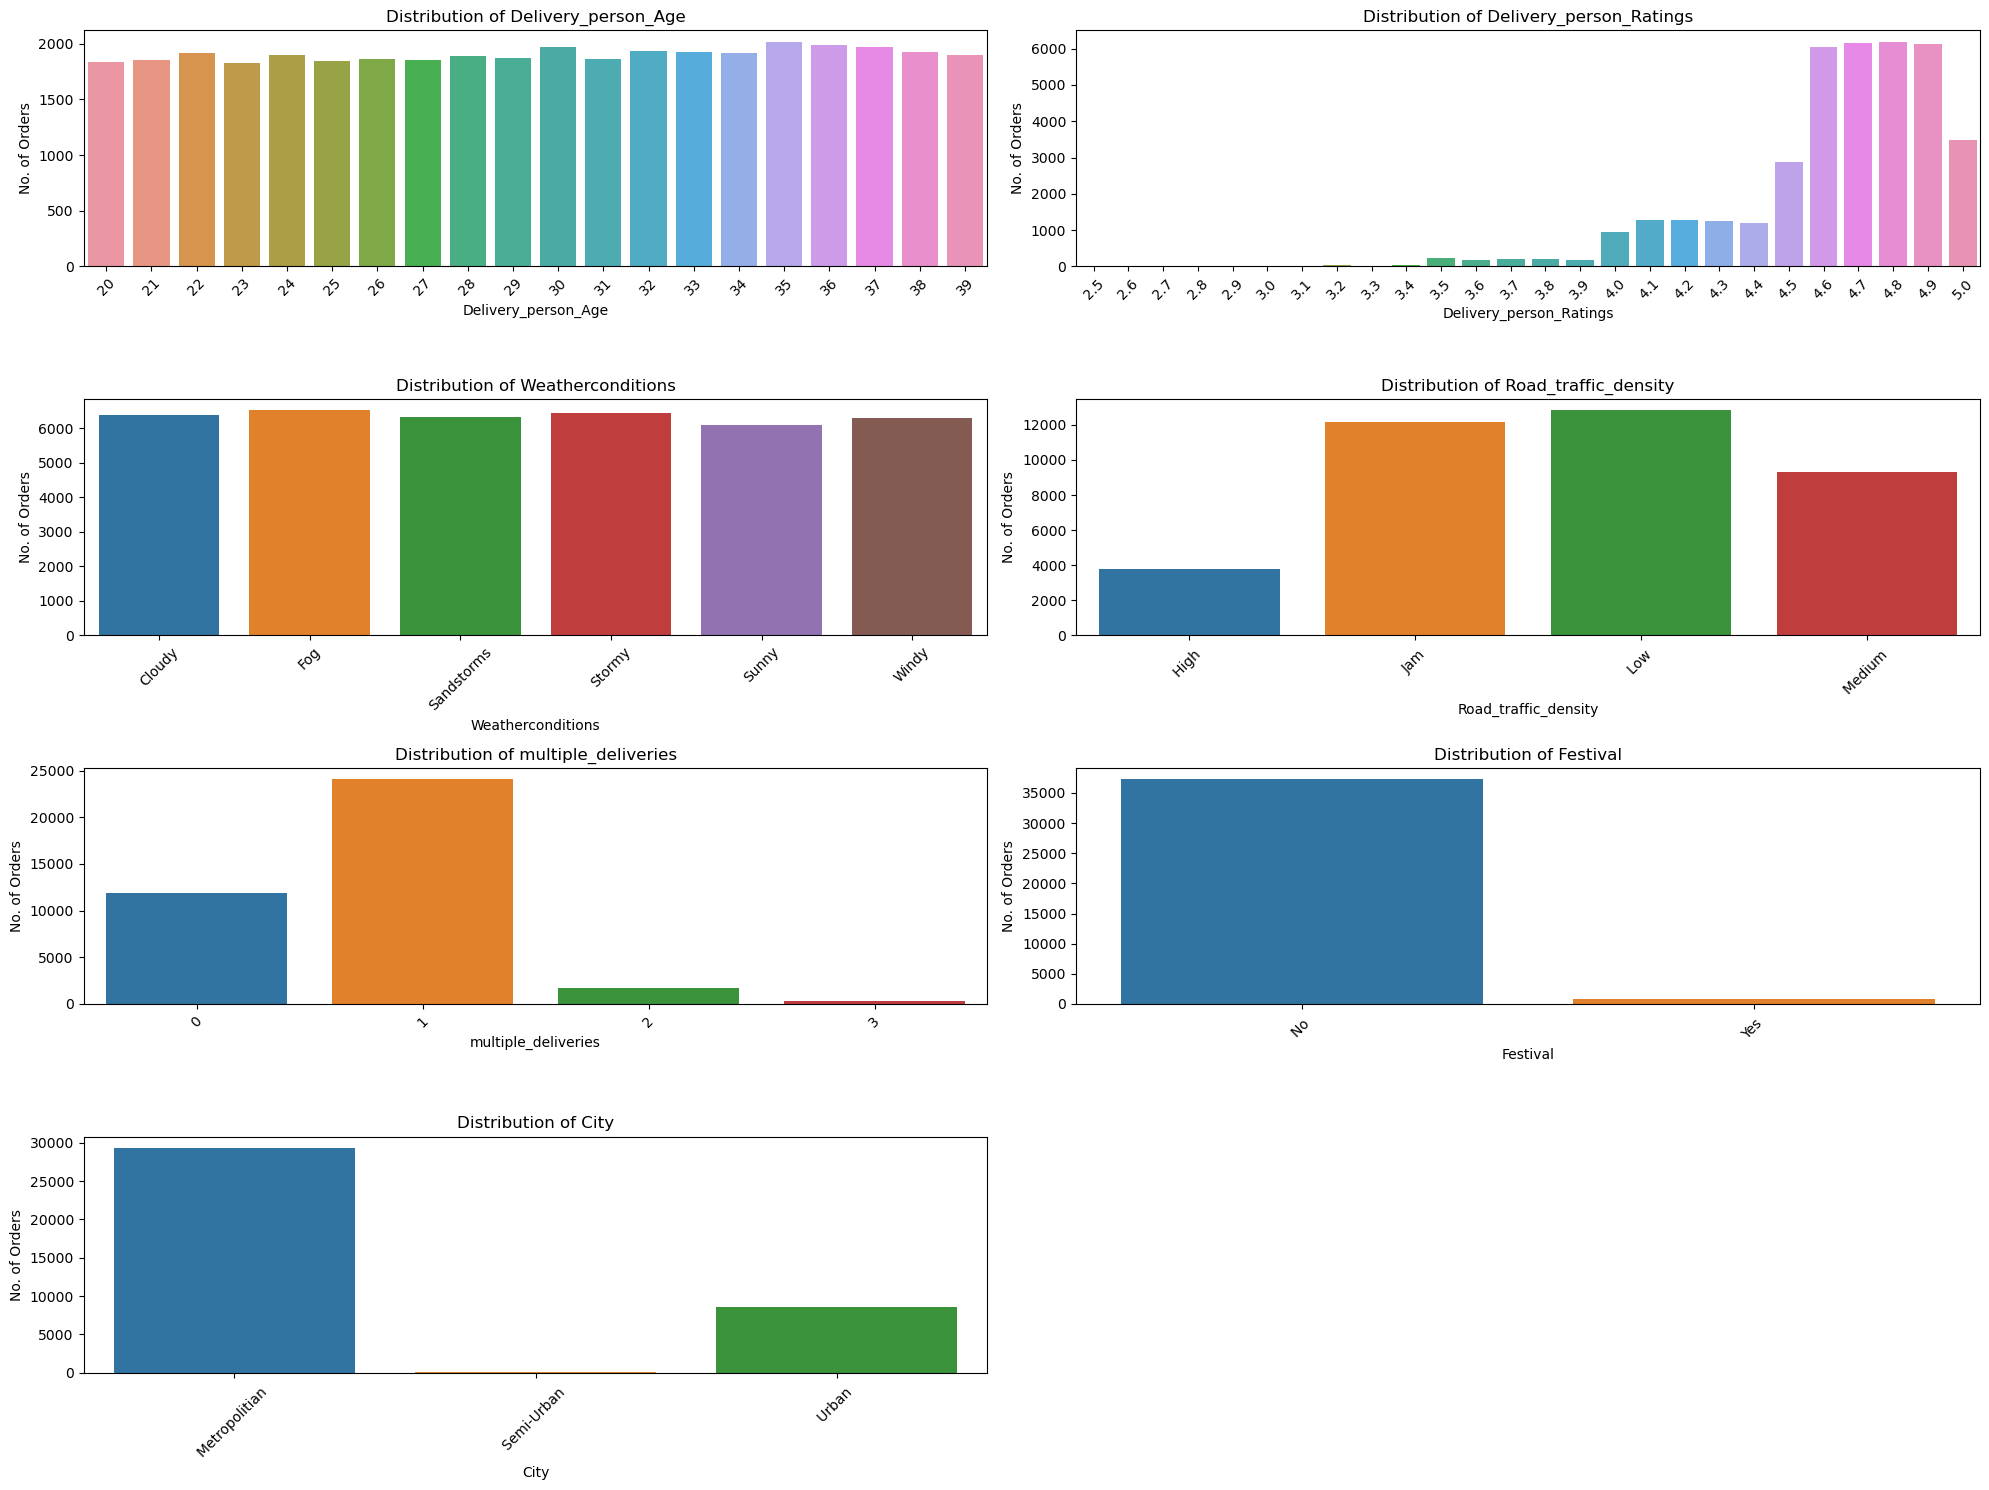

In [12]:
# Visualize the distribution of key categorical features (already cleaned)
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
        'Road_traffic_density', 'multiple_deliveries', 'Festival', 'City']

num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.countplot(
        data=df_train,
        x=column_name,
        order=df_train[column_name].value_counts().sort_index().index,
        ax=ax
    )

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(f'Distribution of {column_name}')
    ax.tick_params(axis='x', rotation=45)

# If odd number of plots, remove empty subplot
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [13]:
#Date Featruring
def extract_date_features(data):
    data["order_day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,...,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,3,1,2022,5,0,0,0,0,0,1
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,3,1,2022,4,0,0,0,0,0,0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,3,1,2022,5,0,0,0,0,0,1
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,4,2,2022,1,0,0,0,0,0,0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,3,1,2022,5,0,0,0,0,0,1


In [14]:
def calculate_time_diff(df):
    # Step 1: Convert time columns to timedelta safely
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'], errors='coerce')
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'], errors='coerce')

    # Step 2: Ensure Order_Date is datetime (not string)
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

    # Step 3: Drop rows where critical values are missing
    df = df[df['Time_Orderd'].notna() & df['Time_Order_picked'].notna() & df['Order_Date'].notna()]

    # Step 4: Add full datetime
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']
    df['Time_Order_picked_formatted'] = df['Order_Date'] + df['Time_Order_picked']

    # Step 5: Handle overnight pickups (picked after midnight)
    mask = df['Time_Order_picked'] < df['Time_Orderd']
    df.loc[mask, 'Time_Order_picked_formatted'] += pd.DateOffset(days=1)

    # Step 5.5: Extract order hour
    df['order_hour'] = df['Time_Ordered_formatted'].dt.hour

    # Step 6: Calculate preparation time in minutes
    df['prep_time_min'] = (
        (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
    ).astype(float)

    # Step 7: Clean and fill missing or extreme values
    df['prep_time_min'] = df['prep_time_min'].clip(lower=5, upper=20)
    df['prep_time_min'] = df['prep_time_min'].interpolate(method='linear')
    df['prep_time_min'] = df['prep_time_min'].fillna(df['prep_time_min'].median())

    # Step 8: Drop temp columns
    df.drop(
        ['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted',
         'Time_Order_picked_formatted', 'Order_Date'],
        axis=1,
        inplace=True
    )

    return df


df_train = calculate_time_diff(df_train)
print(df_train[["prep_time_min", "order_hour"]].head())



   prep_time_min  order_hour
0           15.0          11
1            5.0          19
2           15.0           8
3           10.0          18
4           15.0          13


In [15]:
print(df_train["prep_time_min"].value_counts())
print(df_train["order_hour"].value_counts())

prep_time_min
5.0     12786
10.0    12647
15.0    12630
Name: count, dtype: int64
order_hour
21    4111
19    4071
20    3989
18    3936
22    3895
23    3845
17    3727
11    1703
10    1693
9     1643
8     1563
12     788
15     757
14     683
13     679
16     611
0      369
Name: count, dtype: int64


In [16]:
from geopy.distance import geodesic
import numpy as np
import pandas as pd

def calculate_distance(df: pd.DataFrame) -> None:
    """
    Add a `distance` column (in kilometres, float64) to `df`
    by computing the great‑circle distance between each
    restaurant and delivery location.

    The function mutates `df` in place and does **not** return anything.
    """
    # 1. Pull coordinate pairs as NumPy arrays for faster iteration
    restaurant_coords = df[['Restaurant_latitude', 'Restaurant_longitude']].to_numpy()
    delivery_coords   = df[['Delivery_location_latitude', 'Delivery_location_longitude']].to_numpy()
    
    # 2. Compute geodesic distance row‑wise
    df["distance_km"] = [
        geodesic(rest, dest).kilometers          # accurate WGS‑84 great‑circle distance
        for rest, dest in zip(restaurant_coords, delivery_coords)
    ]
    
    # 3. Optional: handle missing or absurd coordinates
    #    (uncomment if your raw data may have NaNs or zeros)
    # mask_bad = df["distance"].isna() | (df["distance"] == 0)
    # df.loc[mask_bad, "distance"] = np.nan   # keep NaN and impute later if needed

    # 4. If you plan to scale features later, you can leave it as float64.
    #    No rounding or type‑casting here, so you keep full precision.
    
    
calculate_distance(df_train)
df_train[["Restaurant_latitude", "Restaurant_longitude",
          "Delivery_location_latitude", "Delivery_location_longitude",
          "distance_km"]].head()



,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,distance_km
0,22.745049,75.892471,22.765049,75.912471,3.020737
1,12.913041,77.683237,13.043041,77.813237,20.143737
2,12.914264,77.678400,12.924264,77.688400,1.549693
3,11.003669,76.976494,11.053669,77.026494,7.774497
4,12.972793,80.249982,13.012793,80.289982,6.197898


In [18]:
df_train = df_train[df_train["distance_km"] <= 21]
print(df_train["distance_km"].describe())

count    37917.000000
mean         9.745370
std          5.593768
min          1.463837
25%          4.648820
50%          9.203577
75%         13.660122
max         20.942906
Name: distance_km, dtype: float64


In [ ]:
"""
This script performs comprehensive preprocessing and exploratory data analysis (EDA) on the given dataset.
Key steps involved in the workflow include:

1. **Data Cleaning**:
   - Handling missing values
   - Removing duplicates
   - Filtering out irrelevant or inconsistent entries

2. **Data Type Formatting**:
   - Converting columns to appropriate data types (e.g., strings to datetime, integers to category)
   - Ensuring consistency in data formats

3. **Feature Engineering**:
   - Calculating `order_preparing_time` by computing the time difference between order placement and preparation
   - Extracting temporal features (year, month, day, weekday, hour, etc.) from datetime columns

4. **Data Visualization**:
   - Creating informative visualizations using `matplotlib` and `seaborn` to understand trends, distributions, and relationships in the data
   - Visualizing time-based patterns, category distributions, and correlation heatmaps

5. **Additional Enhancements**:
   - Using `numpy` and `pandas` for efficient array and DataFrame operations
   - Leveraging `scikit-learn` utilities where applicable for scaling, encoding, or splitting the data for further analysis or modeling

This structured approach helps in gaining meaningful insights, preparing the dataset for modeling, and ensuring data quality.
"""


In [19]:
print(df_train.columns.tolist())

['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)', 'order_day', 'month', 'quarter', 'year', 'day_of_week', 'is_month_start', 'is_month_end', 'is_quarter_end', 'is_year_start', 'is_year_end', 'is_weekend', 'order_hour', 'prep_time_min', 'distance_km']


In [20]:
# Get all categorical columns (usually 'object' or 'category' dtype)
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns to be encoded:")
print(categorical_columns)


Categorical columns to be encoded:
['Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']


In [21]:
from sklearn.preprocessing import OrdinalEncoder

def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    df[categorical_columns] = oe.fit_transform(df[categorical_columns])
    return oe

# Use this on your training set
encoder = label_encoding(df_train)

# Save encoder
import joblib
joblib.dump(encoder, "encoder.pkl")

df_train.head()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_end,is_year_start,is_year_end,is_weekend,order_hour,prep_time_min,distance_km
0,37,4.9,22.745049,75.892471,22.765049,75.912471,4.0,0.0,2,3.0,...,5,0,0,0,0,0,1,11,15.0,3.020737
1,34,4.5,12.913041,77.683237,13.043041,77.813237,3.0,1.0,2,3.0,...,4,0,0,0,0,0,0,19,5.0,20.143737
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2.0,2.0,0,1.0,...,5,0,0,0,0,0,1,8,15.0,1.549693
3,38,4.7,11.003669,76.976494,11.053669,77.026494,4.0,3.0,0,0.0,...,1,0,0,0,0,0,0,18,10.0,7.774497
4,32,4.6,12.972793,80.249982,13.012793,80.289982,0.0,0.0,1,3.0,...,5,0,0,0,0,0,1,13,15.0,6.197898


In [22]:
df_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'order_day', 'month', 'quarter', 'year',
       'day_of_week', 'is_month_start', 'is_month_end', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'is_weekend', 'order_hour',
       'prep_time_min', 'distance_km'],
      dtype='object')

In [23]:
#Dropping the lantitude and longitude column of resturant and delivery location because we directly provide distance(in km)
def drop_columns(df):
    df.drop([ 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude','month', 'quarter','year','day_of_week','is_month_start','is_month_end', 'is_quarter_end',
       'is_year_start', 'is_year_end'], axis=1, inplace=True)
print("Before No. of columns: ", df_train.shape[1])
drop_columns(df_train)
print("After No. of colums: ", df_train.shape[1])

Before No. of columns:  29
After No. of colums:  16


In [24]:
print(df_train.columns.tolist())

['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)', 'order_day', 'is_weekend', 'order_hour', 'prep_time_min', 'distance_km']


In [25]:
print(df_train['Weatherconditions'].unique())
print(df_train['Road_traffic_density'].unique())
print(df_train['Type_of_order'].unique())
print(df_train['Type_of_vehicle'].unique())
print(df_train['Festival'].unique())
print(df_train['City'].unique())


[4. 3. 2. 0. 1. 5.]
[0. 1. 2. 3.]
[3. 1. 0. 2.]
[1. 2. 0.]
[0. 1.]
[2. 0. 1.]


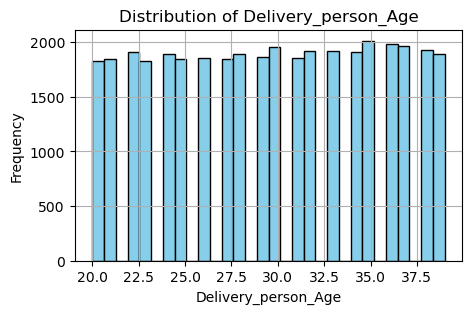

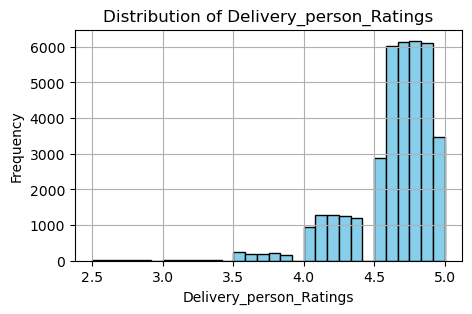

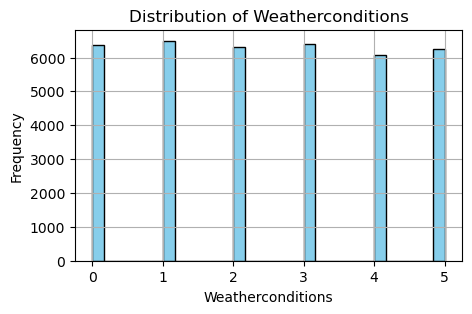

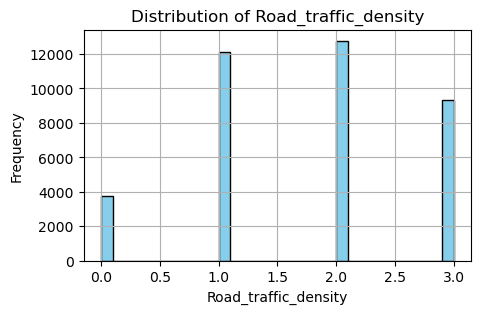

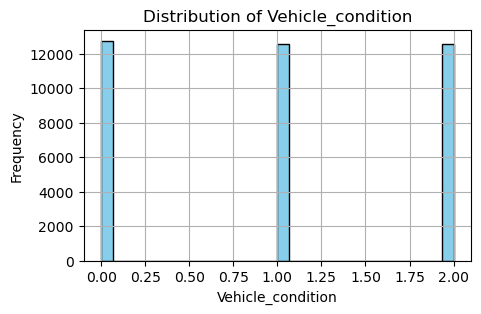

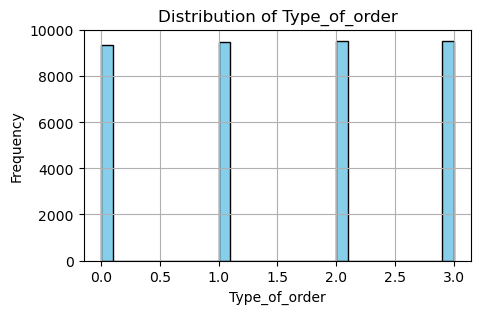

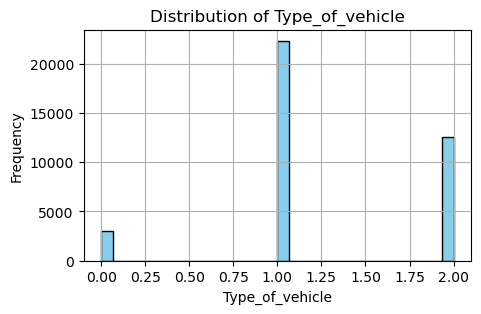

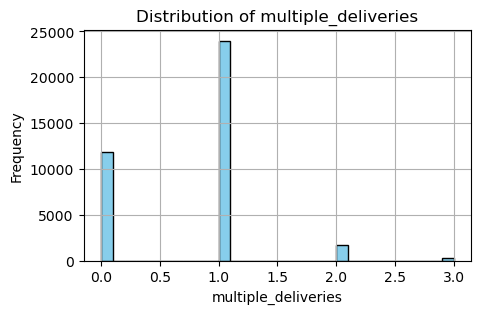

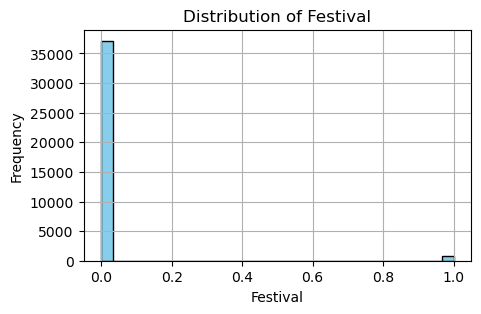

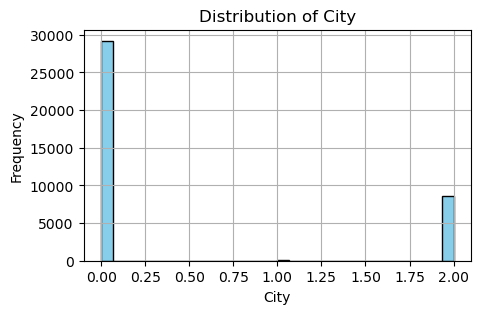

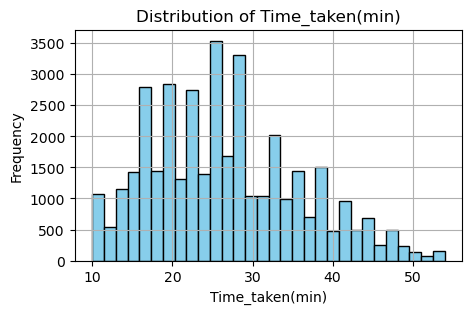

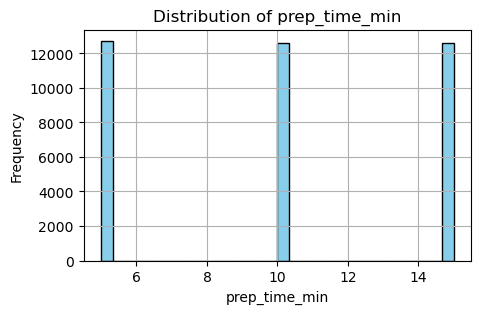

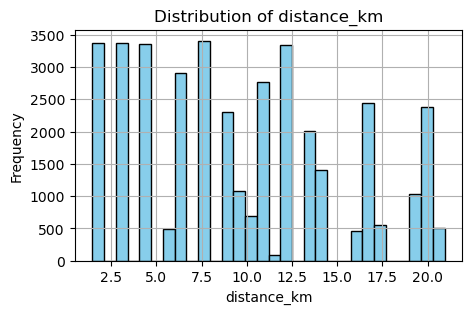

In [26]:
import matplotlib.pyplot as plt

numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df_train[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


In [27]:
print(df_train.isnull().sum())


Delivery_person_Age        0
Delivery_person_Ratings    0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken(min)            0
order_day                  0
is_weekend                 0
order_hour                 0
prep_time_min              0
distance_km                0
dtype: int64


In [28]:
# Check the column names and strip any leading/trailing whitespace
df_train.columns = df_train.columns.str.strip()

# Now try dropping the column again
X = df_train.drop('Time_taken(min)', axis=1)  # Features
y = df_train['Time_taken(min)']  # Target variable

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30333, 15)
(30333,)
(7584, 15)
(7584,)


In [29]:
from sklearn.preprocessing import StandardScaler
import joblib

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [30]:
# ------------------------------------------------------------------
# Libraries
# ------------------------------------------------------------------
import numpy as np
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model    import LinearRegression
from sklearn.tree            import DecisionTreeRegressor
from sklearn.ensemble        import RandomForestRegressor
import xgboost as xgb

# ------------------------------------------------------------------
# Model dictionary: name → (estimator, param_distributions)
# ------------------------------------------------------------------
models = {
    "LinearRegression": (
        LinearRegression(),
        {}                         # nothing to tune
    ),
    "DecisionTree": (
        DecisionTreeRegressor(random_state=42),
        {
            "max_depth":        randint(2, 11),
            "min_samples_split": randint(2, 21)
        }
    ),
    "RandomForest": (
        RandomForestRegressor(
            random_state=42,
            n_jobs=-1
        ),
        {
            "n_estimators":     randint(80, 301),   # 80–300 trees
            "max_depth":        randint(3, 11),
            "min_samples_split": randint(2, 21)
        }
    ),
    "XGBRegressor": (
        xgb.XGBRegressor(
            random_state=42,
            objective="reg:squarederror",
            n_jobs=-1,
            verbosity=0
        ),
        {
            "n_estimators":     randint(20, 101),   # 20–100
            "max_depth":        randint(3, 11),
            "learning_rate":    uniform(0.03, 0.25)
        }
    )
}

# ------------------------------------------------------------------
# Search & report
# ------------------------------------------------------------------
for name, (estimator, param_dist) in models.items():
    # use 10 random draws (1 for linear model = no tuning)
    n_iter = 1 if not param_dist else 10

    search = RandomizedSearchCV(
        estimator,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=5,
        scoring="r2",
        n_jobs=-1,
        random_state=42,
        verbose=1                # prints progress
    )

    search.fit(X_train, y_train)
    print(f"🔹 {name}")
    print("   Best params:", search.best_params_)
    print("   Best R²    :", round(search.best_score_, 3), "\n")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
🔹 LinearRegression
   Best params: {}
   Best R²    : 0.502 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
🔹 DecisionTree
   Best params: {'max_depth': 9, 'min_samples_split': 13}
   Best R²    : 0.822 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
🔹 RandomForest
   Best params: {'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 201}
   Best R²    : 0.839 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
🔹 XGBRegressor
   Best params: {'learning_rate': 0.1448122229914668, 'max_depth': 7, 'n_estimators': 43}
   Best R²    : 0.837 



In [31]:
# ✨ Ready‑to‑run evaluation snippet (requires scikit‑learn ≥ 0.22)
# I am using randomforest , because its easy to maintanin and also its R2 is similar to xgbregressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import numpy as np

# --- train the tuned forest on all training data ---
best_rf = RandomForestRegressor(
    n_estimators=201,
    max_depth=10,
    min_samples_split=8,
    n_jobs=-1,
    random_state=42
)
best_rf.fit(X_train, y_train)

# Evaluate the fitted model (works on any scikit‑learn version)

y_pred = best_rf.predict(X_test)

r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # ← manual RMSE

print(f"Test R² : {r2:.3f}")
print(f"MAE      : {mae:.2f} min")
print(f"RMSE     : {rmse:.2f} min")


Test R² : 0.845
MAE      : 2.96 min
RMSE     : 3.66 min


In [32]:
import joblib

# Save each component individually
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as scaler.pkl")

joblib.dump(encoder, "encoder.pkl")
print("✅ Encoder saved as encoder.pkl")


joblib.dump(best_rf, "rf_model.pkl")
print("✅ Random Forest model saved as rf_delivery.pkl")



✅ Scaler saved as scaler.pkl
✅ Encoder saved as encoder.pkl
✅ Random Forest model saved as rf_delivery.pkl


In [ ]:
model = joblib.load("rf_model.pkl")
print(model.feature_names_in_.tolist())


In [70]:
import joblib
import pandas as pd
import numpy as np

# Load all components
encoder = joblib.load("encoder.pkl")
scaler  = joblib.load("scaler.pkl")
model   = joblib.load("rf_model.pkl")

# The exact feature order used in training
feature_order = model.feature_names_in_.tolist()

# Sample input (with original string values for categorical features)
sample = pd.DataFrame([{
    "Delivery_person_Age"     : np.random.randint(21, 50),
    "Delivery_person_Ratings" : round(np.random.uniform(1, 5.0), 1),
    "Weatherconditions"       : np.random.choice(["Sunny", "Cloudy", "Stormy", "Fog", "Windy","Sandstorms"]),
    "Road_traffic_density"    : np.random.choice(["Jam", "High", "Medium", "Low"]),
    "Vehicle_condition"       : np.random.randint(0, 3),
    "Type_of_order"           : np.random.choice(["Snack", "Meal", "Drinks", "Buffet"]),
    "Type_of_vehicle"         : np.random.choice(["motorcycle", "scooter", "electric_scooter"]),
    "multiple_deliveries"     : np.random.randint(0, 4),
    "Festival"                : np.random.choice(["Yes", "No"]),
    "City"                    : np.random.choice(["Urban", "Semi-Urban", "Metropolitian"]),
    "order_day"               : np.random.randint(1, 32),
    "is_weekend"              : np.random.randint(0, 2),
    "order_hour"              : np.random.randint(7, 24),
    "prep_time_min"           : round(np.random.uniform(5.0, 20.0), 1),
    "distance_km"             : round(np.random.uniform(1.0, 25.0), 2)
}])

# Step 1: Encode categorical columns (must match training)
categorical_columns = encoder.feature_names_in_.tolist()
sample[categorical_columns] = encoder.transform(sample[categorical_columns])

# Step 2: Reorder sample columns to match model
sample = sample[feature_order]

# Step 3: Scale the input
sample_scaled = scaler.transform(sample)

# Step 4: Predict
pred_minutes = model.predict(sample_scaled)[0]
print(f"🕒  Predicted delivery time: {pred_minutes:.2f} minutes")


🕒  Predicted delivery time: 30.31 minutes


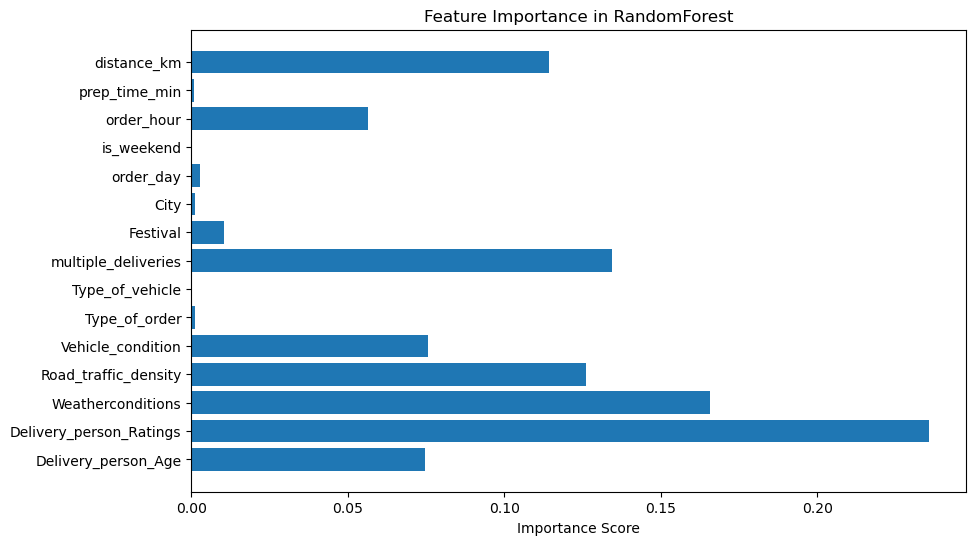

In [43]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = model.feature_names_in_

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Feature Importance in RandomForest")
plt.xlabel("Importance Score")
plt.show()


In [44]:
import joblib
import pandas as pd
import numpy as np

# Load all components
encoder = joblib.load("encoder.pkl")
scaler  = joblib.load("scaler.pkl")
model   = joblib.load("rf_model.pkl")

# The exact feature order used in training
feature_order = model.feature_names_in_.tolist()

# Sample input (with original string values for categorical features)
sample = pd.DataFrame([{
    "Delivery_person_Age"     : np.random.randint(21, 50),
    "Delivery_person_Ratings" : round(np.random.uniform(3.5, 5.0), 1),
    "Weatherconditions"       : "Sunny",
    "Road_traffic_density"    : "Jam",
    "Vehicle_condition"       : 2,
    "Type_of_order"           : "Snack",
    "Type_of_vehicle"         : "scooter",
    "multiple_deliveries"     : 1,
    "Festival"                : "No",
    "City"                    : "Urban",
    "order_day"               : np.random.randint(1, 32),
    "is_weekend"              : 1,
    "order_hour"              : 14,
    "prep_time_min"           : 12.5,
    "distance_km"             : 8.4
}])

# Step 1: Encode categorical columns
categorical_columns = encoder.feature_names_in_.tolist()
sample[categorical_columns] = encoder.transform(sample[categorical_columns])

# Step 2: Reorder columns to match training
sample = sample[feature_order]

# 🚨 Insert this block here — after sample is ready, before actual prediction
# Modify "distance_km" to test its effect on prediction
sample.at[0, "distance_km"] = 2
pred1 = model.predict(scaler.transform(sample))[0]

sample.at[0, "distance_km"] = 20
pred2 = model.predict(scaler.transform(sample))[0]

print(f"Pred with 2 km: {pred1:.2f} min")
print(f"Pred with 20 km: {pred2:.2f} min")

# Optionally: show original prediction for current input
# sample_scaled = scaler.transform(sample)
# pred_minutes = model.predict(sample_scaled)[0]
# print(f"🕒  Predicted delivery time: {pred_minutes:.2f} minutes")


Pred with 2 km: 30.88 min
Pred with 20 km: 30.33 min


In [47]:
def predict_with_distance_change(sample_base, distance_value, encoder, scaler, model, feature_order):
    # Clone the base sample
    sample = sample_base.copy()
    
    # Change distance
    sample.at[0, "distance_km"] = distance_value

    # Re-encode
    categorical_columns = encoder.feature_names_in_.tolist()
    sample[categorical_columns] = encoder.transform(sample[categorical_columns])

    # Reorder and scale
    sample = sample[feature_order]
    sample_scaled = scaler.transform(sample)
    
    print("Scaled distance:", sample_scaled[0][feature_order.index("distance_km")])

    # Predict
    return model.predict(sample_scaled)[0]


# Prepare base sample (original values before encoding)
base_sample = pd.DataFrame([{
    "Delivery_person_Age"     : 30,
    "Delivery_person_Ratings" : 4.5,
    "Weatherconditions"       : "Sunny",
    "Road_traffic_density"    : "Low",
    "Vehicle_condition"       : 1,
    "Type_of_order"           : "Meal",
    "Type_of_vehicle"         : "motorcycle",
    "multiple_deliveries"     : 1,
    "Festival"                : "No",
    "City"                    : "Urban",
    "order_day"               : 12,
    "is_weekend"              : 0,
    "order_hour"              : 15,
    "prep_time_min"           : 10.5,
    "distance_km"             : 5
}])

# Run prediction for 2 km and 20 km
pred1 = predict_with_distance_change(base_sample, 2, encoder, scaler, model, feature_order)
pred2 = predict_with_distance_change(base_sample, 20, encoder, scaler, model, feature_order)

print(f"Pred with 2 km: {pred1:.2f} min")
print(f"Pred with 20 km: {pred2:.2f} min")


Scaled distance: -1.3874129622770612
Scaled distance: 1.8255794346683074
Pred with 2 km: 26.51 min
Pred with 20 km: 25.68 min


In [ ]:
# Index of distance_km
index = feature_order.index("distance_km")

# Print its actual importance
print("Feature importance for distance_km:", model.feature_importances_[index])


In [54]:
for d in [1, 5, 10, 15, 20, 25]:
    sample.at[0, "distance_km"] = d
    sample_scaled = scaler.transform(sample[feature_order])
    pred = model.predict(sample_scaled)[0]
    print(f"Distance {d} km → Prediction: {pred:.2f} min")


Distance 1 km → Prediction: 26.92 min
Distance 5 km → Prediction: 26.92 min
Distance 10 km → Prediction: 26.92 min
Distance 15 km → Prediction: 26.92 min
Distance 20 km → Prediction: 26.02 min
Distance 25 km → Prediction: 25.96 min


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df_train["distance_km"], df_train["Time_taken(min)"], alpha=0.3, color='blue')
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.title("Distance vs. Delivery Time")
plt.grid(True)
plt.show()


In [45]:
print(df_train["distance_km"].describe())
print(df_train["distance_km"].sort_values(ascending=False).head(10))


count    37917.000000
mean         9.745370
std          5.593768
min          1.463837
25%          4.648820
50%          9.203577
75%         13.660122
max         20.942906
Name: distance_km, dtype: float64
13145    20.942906
754      20.942906
21758    20.942906
14057    20.942471
21374    20.942471
13930    20.942471
9351     20.942455
16560    20.942455
9555     20.942421
33315    20.942421
Name: distance_km, dtype: float64


In [46]:
df_train[df_train["distance_km"] > 21][["distance_km", "Time_taken(min)"]]


,distance_km,Time_taken(min)


In [ ]:
numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

# Summary statistics
print(df_train[numeric_cols].describe())

# Plot histograms
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure()
    df_train[col].hist(bins=50)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


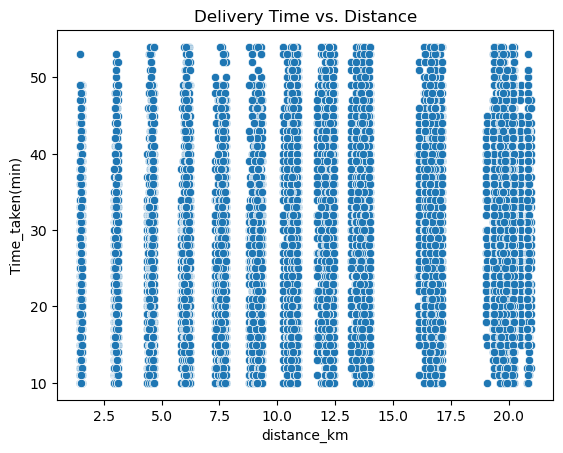

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="distance_km", y="Time_taken(min)", data=df_train)
plt.title("Delivery Time vs. Distance")
plt.show()


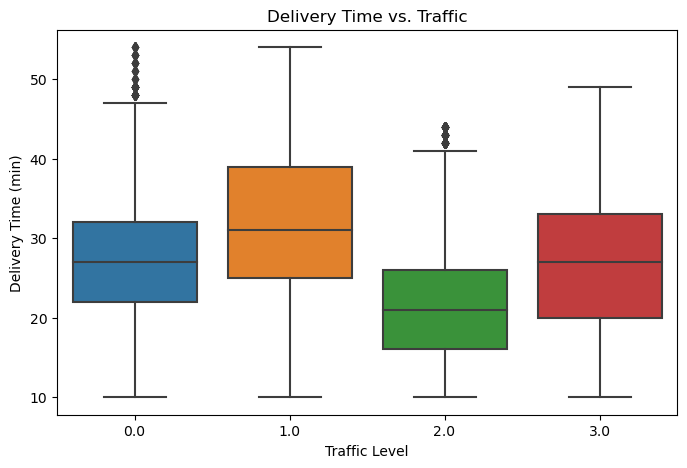

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="Road_traffic_density", y="Time_taken(min)", data=df_train)
plt.title("Delivery Time vs. Traffic")
plt.xlabel("Traffic Level")
plt.ylabel("Delivery Time (min)")
plt.show()
